In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

### Explanation of diamonds
carat - Carat weight of the diamond

cut - Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal

color - Color of the diamond, with D being the best and J the worst

clarity - How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

depth - depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter

table - table%: The width of the diamond's table expressed as a percentage of its average diameter

price - the price of the diamond

x - length mm
y - width mm
z - depth mm

In [2]:
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [4]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [37]:
dupe = df.duplicated()
df[dupe]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
2183,1.00,Fair,E,SI2,67.0,53.0,3136,6.19,6.13,4.13
2820,1.00,Fair,F,SI2,65.1,55.0,3265,6.26,6.23,4.07
3156,0.90,Very Good,I,VS2,58.4,62.0,3334,6.29,6.35,3.69
3704,1.00,Ideal,E,SI2,62.9,56.0,3450,6.32,6.30,3.97
3981,1.00,Fair,H,SI1,65.5,57.0,3511,6.26,6.21,4.08


In [58]:
df.drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [7]:
df.notnull()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,True


In [8]:
df_no_missing = df.dropna()
df_no_missing

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [9]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [10]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [11]:
df = df.drop('Unnamed: 0', axis=1)

In [12]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [13]:
df.describe

<bound method NDFrame.describe of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6       0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7       0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8       0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9       0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
10      0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
11      0.23      Ideal     J     VS1   62

In [14]:
df.corr

<bound method DataFrame.corr of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6       0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7       0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8       0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9       0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
10      0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
11      0.23      Ideal     J     VS1   62.8

C:\Users\D\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


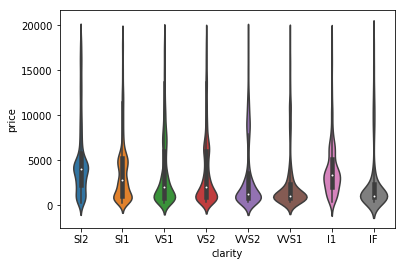

In [15]:
sns.violinplot(x='clarity', y='price', data=df)

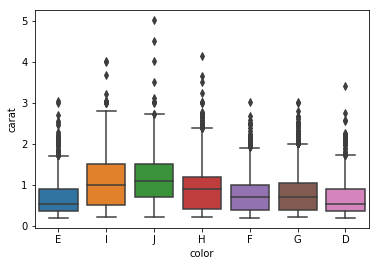

In [16]:
sns.boxplot(x='color', y= 'carat', data=df)


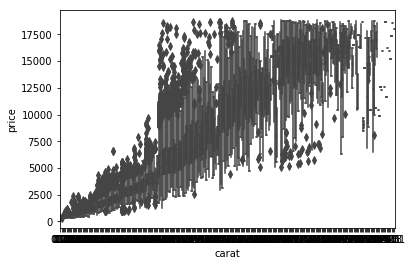

In [17]:
sns.boxplot(x='carat', y= 'price', data=df)

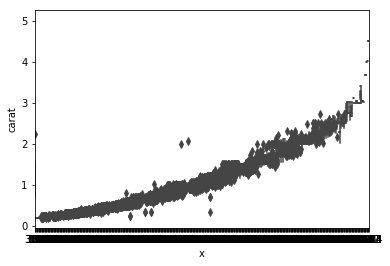

In [18]:
sns.boxplot(x='x', y= 'carat', data=df)


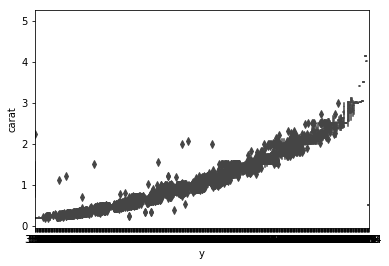

In [19]:
sns.boxplot(x='y', y= 'carat', data=df)


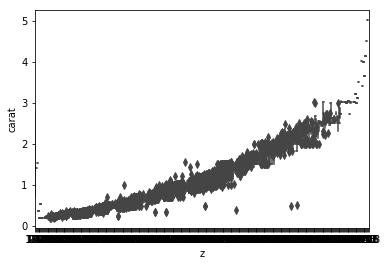

In [20]:
sns.boxplot(x='z', y= 'carat', data=df)


In [21]:
mxpr = df['price'].max()
maxprice = df[df['price']==mxpr]
maxprice.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


In [22]:
medianpr = df['price'].median()
medianprice = df[df['price']== medianpr]
medianprice.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
51709,0.58,Ideal,F,VS2,61.8,57.0,2401,5.39,5.35,3.32
51710,0.72,Very Good,I,VS1,60.7,56.0,2401,5.78,5.82,3.52
51711,0.70,Very Good,F,SI1,63.5,56.0,2401,5.58,5.66,3.57
51712,0.78,Very Good,G,SI2,63.7,55.9,2401,5.82,5.85,3.72
51713,0.72,Very Good,E,SI2,62.2,59.0,2401,5.72,5.79,3.58


In [23]:
minpr = df['price'].min()
minprice = df[df['price']== minpr]
minprice.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [24]:
mincts = df['carat'].min()
mincarat = df[df['carat']== mincts]
mincarat.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
14,0.2,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
31591,0.2,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26
31592,0.2,Premium,E,VS2,59.0,60.0,367,3.81,3.78,2.24
31593,0.2,Premium,E,VS2,61.1,59.0,367,3.81,3.78,2.32
31594,0.2,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28


In [25]:
mediancts = df['carat'].median()
mediancarat = df[df['carat']== mediancts]
mediancarat.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
90,0.7,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57
92,0.7,Ideal,G,VS2,61.6,56.0,2757,5.70,5.67,3.50
95,0.7,Good,E,VS2,57.5,58.0,2759,5.85,5.90,3.38
96,0.7,Good,F,VS1,59.4,62.0,2759,5.71,5.76,3.40
118,0.7,Ideal,E,VS2,60.7,58.0,2762,5.73,5.76,3.49


In [26]:
mxcts = df['carat'].max()
maxcarat = df[df['carat']== mxcts]
maxcarat.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


In [27]:
group_clarity = df.groupby('clarity').mean()
group_clarity.head()

,carat,depth,table,price,x,y,z
clarity,,,,,,,
I1,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,4.207908
IF,0.505123,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659
SI1,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.639845
SI2,1.077648,61.772167,57.927181,5063.028606,6.401370,6.397826,3.948478
VS1,0.727158,61.667458,57.315151,3839.455391,5.572178,5.581828,3.441007


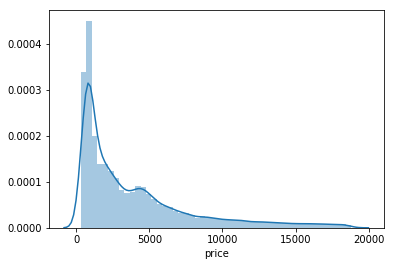

In [28]:
sns.distplot(df['price'])

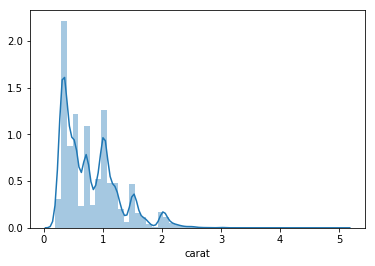

In [29]:
sns.distplot(df['carat'])

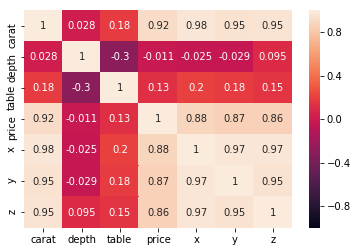

In [30]:
corr = df.corr()

sns.heatmap(corr, vmin=-1, annot=True)

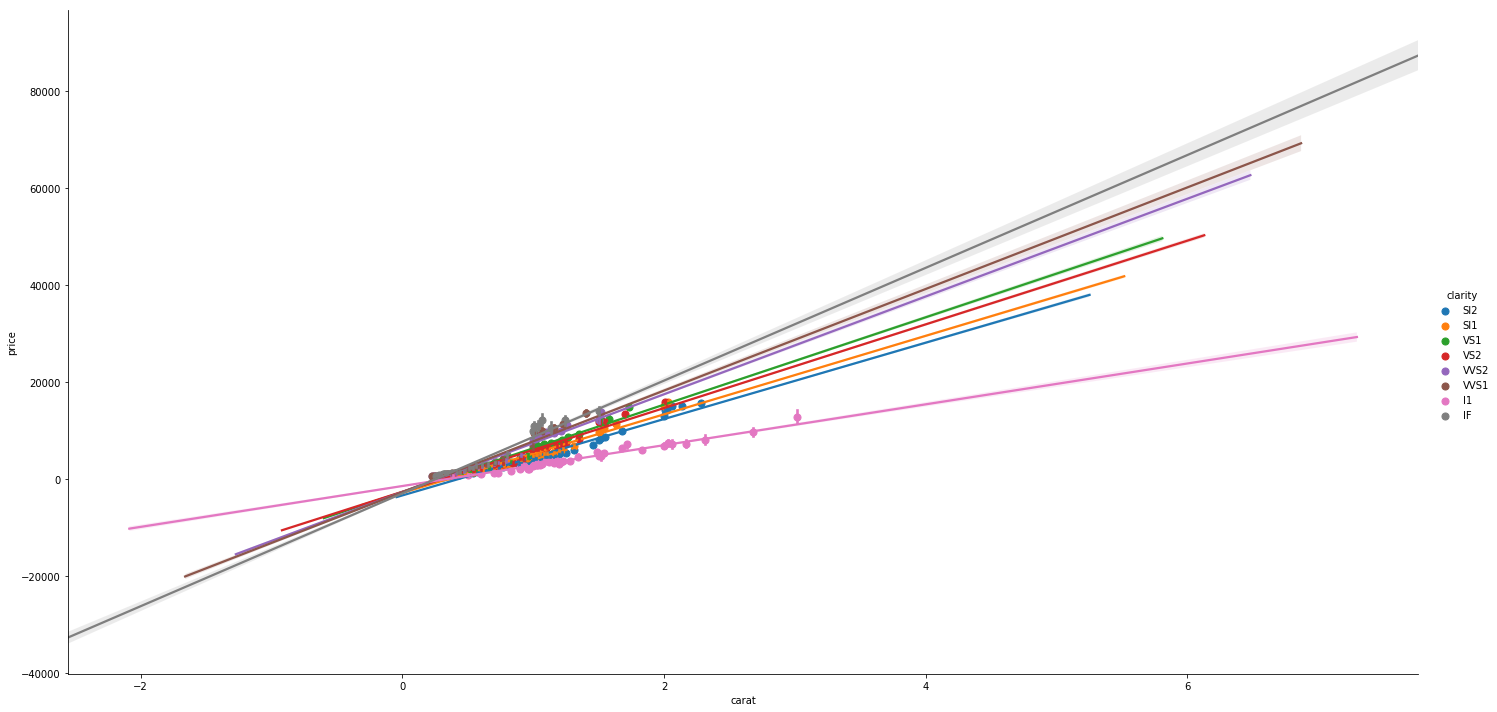

In [31]:
g = sns.lmplot(x='carat', y='price', hue='clarity', x_bins=50, height=10,aspect=2, data=df)

### SUMMARY CONCLUSION ABOUT THE DIAMOND CSV DATA - GROUP PROJECT 1
Initially 53,940 records. 146 records were duplicates and removed resulting in 53,794 records to analyze. The diamonds range in price from 346 to 18,823 dollars. The carat size ranges from .2 cts to 5.01 cts. There is a positive relationship between Price and Carat. The majority of the diamonds are Fair to Very Good cuts, I in color, and SI1 clarity.
The average size of diamond is ~ .80 cts. and average price of 3933 dollars however it is not a true representation of the diamond data. The histograms of price and carat reflect the diamond data is not a Normal Distribution but a Poisson Distribution which means the data is heavily represented in one area more than the rest of the data. Using the median data would be a more acurate representation of the data so therefore the Median size of diamond is ~ .70 cts and median price is 2401 dollars.

In [32]:
import statsmodels.formula.api as smf

In [33]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [34]:
result = smf.ols('price ~ carat + x + y + z-1', data=df).fit()

In [35]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.676e+05
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:56:24   Log-Likelihood:            -4.7204e+05
No. Observations:               53940   AIC:                         9.441e+05
Df Residuals:                   53936   BIC:                         9.441e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       9139.4524     20.693    441.660      0.000    9098.893    9180.012
x           -467.1759     33.639    -13.888      0.000    -533.109    -401.243
y            176.4676     25.933      6.805      0.000     125.639     227.297
z           -480.9702     39.062    -12.313      0.000    -557.532    -404.409
==============================================================================
Omnibus:                    14184.664   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           236479.997
Skew:                           0.827   Prob(JB):                         0.00
Kurtosis:                      13.123   Cond. No.                         65.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""